# Электродинамический расчёт волнового двигателя с внутренним расходом энергии Ф.Ф.Менде (MenDrive)

А.Ю.Дроздов

Основываясь на решении задач из задачника Батыгина Топтыгина

Batygin_Toptygin_task_464_465.sage

В. В. БАТЫГИН, И. Н. ТОПТЫГИН
СБОРНИК ЗАДАЧ
по
ЭЛЕКТРОДИНАМИКЕ
МОСКВА 1970

512. Бесконечно протяженный диэлектрический слой заполняет в вакууме область $-a<=x<=a$ и имеет проницаемости $\epsilon$ и $\mu$.
Показать, что такой слой может действовать как волновод (для этого нужно, чтобы поле бегущей электромагнитной волны концентрировалось, в основном, внутри слоя). Определить типы волн, которые могут распространяться в таком волноводе. Ограничиться случаем, когда векторы поля не зависят от координаты $y$.

513. Диэлектрический слой с проницаемостями $\epsilon$, $\mu$, заполняющий область $0<=x<=a$, нанесен на поверхность идеального
проводника. В области $x>a$ - вакуум. Какие типы электромагнитных волн с амплитудой, убывающей при удалении от слоя, могут распространяться вдоль слоя? Сравнить возможные типы волн с системой волн, полученной в предыдущей задаче.

В издании 1962 года номера этих задач 464 и 465

рассчитаем тягу в

http://fmnauka.narod.ru/dvigatel_emdrive.pdf

Ф.Ф. МЕНДЕ, ВОЛНОВОЙ ДВИГАТЕЛЬ С ВНУТРЕННИМ РАСХОДОМ ЭНЕРГИИ ЭЛЕКТРОМАГНИТНЫХ КОЛЕБАНИЙ

геометрия задачи следующая: 

поверхность идеального проводника $x<=0$

вакуума внутри резонатора заполняет область $0<=x<=a$

В области $x>a$ - плохой проводник

$rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\,\vec{H}$

$rot\,\vec{H} = - \frac{i\,\omega}{c} \epsilon \vec{E}$

$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}rot\,\vec{H}$

$rot\,rot\,\vec{E} = \mu\,\frac{i\,\omega}{c}\left(- \frac{i\,\omega}{c} \epsilon \vec{E}\right)$

$rot\,rot\,\vec{E} = \mu\,\frac{\omega^2}{c^2} \epsilon \vec{E}$

$rot\,rot\,\vec{E} = grad\,div\,\vec{E} - Laplasian\,\vec{E}$

$Laplasian\,\vec{E} + \frac{\mu \epsilon \omega^2}{c^2}\,\vec{E} - grad\,div\,\vec{E} = 0$


$div\,\vec{E} = 0$

для вакуума внутри резонатора ищем решение в виде

$\vec{E} = \vec{E}(x)\,e^{i\,k\,z}\,e^{-i\,\omega\,t}$

подставляя в исходное уравнение приходим к обыкновенному дифференциальному уравнению

$$\frac{\partial^{2}}{(\partial {x})^{2}}\vec{E}(x) + \left(\frac{\mu \epsilon \omega^2}{c^2} - k^2\right)\,\vec{E}(x) = 0$$

для вакуума внутри резонатора производим следующую замену переменных

$\kappa^2 = \frac{\mu \epsilon \omega^2}{c^2} - k_z^2$

теперь получаем дифференциальное уравнение для вакуума внутри резонатора

$$\frac{\partial^{2}}{(\partial {x})^{2}}\vec{E}(x) + \kappa^2\,\vec{E}(x) = 0$$

для проводящего металла с потерями ищем решение в виде

$\vec{E} = \vec{E}\,e^{i\,ks_x\,x}\,e^{i\,k_z\,z}\,e^{-i\,\omega\,t}$

в котором волновой вектор, направленный вдоль оси z действителен, а волновой вектор, направленный вдоль оси x может быть комплексным $ks_x = k_x + i\,s_x$

принимая модель комплексного представления диэлектрической проницаемости $\epsilon' = \epsilon + \frac{4\pi\,\sigma}{\omega}\,i$ (плохой проводник)

подставляем решение в

$Laplasian\,\vec{E} + \frac{\mu \omega^2}{c^2}\left(\epsilon + \frac{4\pi\,\sigma}{\omega}\,i\right)\,\vec{E} - grad\,div\,\vec{E} = 0$

и принимая

$div\,\vec{E} = 0$

приходим к

$$-ks_x^{2}\vec{E} + \left(\frac{\mu \omega^2}{c^2}\left(\epsilon + \frac{4\pi\,\sigma}{\omega}\,i\right) - k_z^2\right)\,\vec{E} = 0$$

приходим к

$$\left(\frac{\mu \omega^2}{c^2}\epsilon + \frac{\mu \omega^2}{c^2}\frac{4\pi\,\sigma}{\omega}\,i - k_z^2 - ks_x^2\right) = 0$$


In [1]:
from IPython.display import display, Math, Latex

mu = var('mu')
assume(mu, 'real')
assume(mu>0)

epsilon = var('epsilon')
assume(epsilon, 'real')
assume(epsilon>0)

sigma = var('sigma')
assume(sigma, 'real')
assume(sigma>0)

s_x = var ('s_x')
assume(s_x, 'real')
assume(s_x>0)

kappa = var ('kappa')
assume(kappa, 'real')
assume(kappa>0)

ks_x = var ('ks_x')
assume(ks_x, 'complex')

k_x = var('k_x')
assume(k_x, 'real')

k_z = var ('k_z')
assume(k_z, 'real')

a = var('a')
assume(a, 'real')
assume(a>0)

x = var('x')
y = var('y')
z = var('z')

assume(x, 'real')
assume(y, 'real')
assume(z, 'real')

c = var('c')
assume(c, 'real')
assume(c>0)

omega = var('omega')
assume(omega, 'real')

In [2]:
# исходя из вида дифференциальных уравнений для вакуума внутри резонатора и проводящего металла с потерями
# записываем соотнощения для волнового вектора в виде уравнений
eq_kappa_inner_vacuum = omega^2 / c^2 - k_z^2 == kappa^2
print("eq_kappa_inner_vacuum =")
display(Math(latex(eq_kappa_inner_vacuum)))

eq_bad_conductor   = mu * omega^2 / c^2 * (epsilon + I * 4 * pi * sigma / omega) - ks_x^2 - k_z^2 == 0
eq_s_bad_conductor = eq_bad_conductor.subs(ks_x = k_x + I*s_x).expand()

print("eq_bad_conductor =")
display(Math(latex(eq_bad_conductor)))
print("eq_s_bad_conductor =")
display(Math(latex(eq_s_bad_conductor)))

eq_s_bad_conductor_re = eq_s_bad_conductor.lhs().real() == 0
print("eq_s_bad_conductor_re =")
display(Math(latex(eq_s_bad_conductor_re)))

eq_s_bad_conductor_im = eq_s_bad_conductor.lhs().imag() == 0
print("eq_s_bad_conductor_im =")
display(Math(latex(eq_s_bad_conductor_im)))

sx_sol = solve(eq_s_bad_conductor, s_x)
print("sx_sol =")
display(Math(latex(sx_sol)))

s_x_sol = solve([eq_s_bad_conductor_re, eq_s_bad_conductor_im], s_x)
print("s_x_sol =")
display(Math(latex(s_x_sol)))

ksx_sol = solve(eq_bad_conductor, ks_x)
print("ksx_sol =")
display(Math(latex(ksx_sol)))

ksx_sol_re = (ksx_sol[1].rhs()).real()
ksx_sol_im = (ksx_sol[1].rhs()).imag()

print("ksx_sol_re =")
display(Math(latex(ksx_sol_re)))

print("ksx_sol_im =")
display(Math(latex(ksx_sol_im)))

eq_kappa_inner_vacuum =


<IPython.core.display.Math object>

eq_bad_conductor =


<IPython.core.display.Math object>

eq_s_bad_conductor =


<IPython.core.display.Math object>

eq_s_bad_conductor_re =


<IPython.core.display.Math object>

eq_s_bad_conductor_im =


<IPython.core.display.Math object>

sx_sol =


<IPython.core.display.Math object>

s_x_sol =


<IPython.core.display.Math object>

ksx_sol =


<IPython.core.display.Math object>

ksx_sol_re =


<IPython.core.display.Math object>

ksx_sol_im =


<IPython.core.display.Math object>

In [3]:
simplify_epsilon_0_mu_1 = False

In [4]:
if simplify_epsilon_0_mu_1:
    eq_bad_conductor   = eq_bad_conductor.subs(epsilon == 0, mu == 1)

    print("eq_bad_conductor =")
    display(Math(latex(eq_bad_conductor)))

In [5]:
omega2_sol = solve(eq_kappa_inner_vacuum, omega^2)
print("omega2_sol =")
display(Math(latex(omega2_sol)))

# решаем полученные обыкновенные дифференциальные уравнения
E = function('E')(x)

de_inner_vacuum = diff (E, x, 2) + kappa^2 * E == 0
E_inner_vacuum = desolve(de_inner_vacuum, E, ivar = x)

# получая таким образом выражения для электрического поля в вакуума внутри резонатора и внутри проводящего металла с потерями
print("E_inner_vacuum =")
display(Math(latex(E_inner_vacuum)))
# _K2*cos(kappa*x) + _K1*sin(kappa*x)

omega2_sol =


<IPython.core.display.Math object>

E_inner_vacuum =


<IPython.core.display.Math object>

In [6]:
B1_z = var ('B1_z')
B2_z = var ('B2_z')
A2_z = var ('A2_z')

B1_x = var ('B1_x')
B2_x = var ('B2_x')
A2_x = var ('A2_x')

B1_y = var ('B1_y')
B2_y = var ('B2_y')
A2_y = var ('A2_y')

In [7]:
# 2D
set_Ey_0 = True

In [8]:
if set_Ey_0:
    B1_y = 0
    B2_y = 0
    A2_y = 0
    k_y  = 0

In [9]:
# выражения для электрического поля
# в вакууме внутри резонатора 
E_inner_vacuum_z (x) = B1_z*cos(kappa*x) + B2_z*sin(kappa*x)
E_inner_vacuum_x (x) = B1_x*cos(kappa*x) + B2_x*sin(kappa*x)
E_inner_vacuum_y (x) = B1_y*cos(kappa*x) + B2_y*sin(kappa*x)

print ("E_inner_vacuum_z (x) ")
display(Math(latex(E_inner_vacuum_z (x))))
print ("E_inner_vacuum_x (x) =")
display(Math(latex(E_inner_vacuum_x (x))))
print ("E_inner_vacuum_y (x) =")
display(Math(latex(E_inner_vacuum_y (x))))

E_inner_vacuum_z (x) 


<IPython.core.display.Math object>

E_inner_vacuum_x (x) =


<IPython.core.display.Math object>

E_inner_vacuum_y (x) =


<IPython.core.display.Math object>

решение для проводящего металла с потерями

$\vec{E} = \vec{E}\,e^{i\,ks_x\,x}\,e^{i\,k_z\,z}\,e^{-i\,\omega\,t}$

$ks_x = k_x + i\,s_x$

$\vec{E} = \vec{E}\,e^{-s_x\,x}\,e^{i\,k_x\,x}\,e^{i\,k_z\,z}\,e^{-i\,\omega\,t}$

In [10]:
# x > a
# в проводящем металле с потерями
if True:
    E_bad_conductor_z (x) = A2_z * e^(I*ks_x*x)
    E_bad_conductor_x (x) = A2_x * e^(I*ks_x*x)
    E_bad_conductor_y (x) = A2_y * e^(I*ks_x*x)
else:
    E_bad_conductor_z (x) = A2_z * e^(I*ks_x*(x-a))
    E_bad_conductor_x (x) = A2_x * e^(I*ks_x*(x-a))
    E_bad_conductor_y (x) = A2_y * e^(I*ks_x*(x-a))

print ("E_bad_conductor_z (x) ")
display(Math(latex(E_bad_conductor_z (x))))
print ("E_bad_conductor_x (x) =")
display(Math(latex(E_bad_conductor_x (x))))
print ("E_bad_conductor_y (x) =")
display(Math(latex(E_bad_conductor_y (x))))

E_bad_conductor_z (x) 


<IPython.core.display.Math object>

E_bad_conductor_x (x) =


<IPython.core.display.Math object>

E_bad_conductor_y (x) =


<IPython.core.display.Math object>

In [11]:
# выражения для магнитного поля в вакууме внутри резонатора и в проводящем металле с потерями
# rot E = -1/c dB/dt
# H_y = c / (I * omega * mu) * (diff(E_x, z) - diff(E_z, x))

H_inner_vacuum_y  (x) = c / (I * omega)      * (I*k_z*E_inner_vacuum_x  (x) - diff(E_inner_vacuum_z  (x), x))
H_bad_conductor_y (x) = c / (I * omega * mu) * (I*k_z*E_bad_conductor_x (x) - diff(E_bad_conductor_z (x), x))

H_inner_vacuum_y  (x) = c / (omega)      * (k_z*E_inner_vacuum_x  (x) + I * diff(E_inner_vacuum_z  (x), x))
H_bad_conductor_y (x) = c / (omega * mu) * (k_z*E_bad_conductor_x (x) + I * diff(E_bad_conductor_z (x), x))

print ("H_inner_vacuum_y (x) ")
display(Math(latex(H_inner_vacuum_y (x).simplify())))
print ("H_bad_conductor_y (x) =")
display(Math(latex(H_bad_conductor_y (x))))

H_inner_vacuum_y (x) 


<IPython.core.display.Math object>

H_bad_conductor_y (x) =


<IPython.core.display.Math object>

In [12]:
# выражения для магнитного поля в вакууме внутри резонатора и в проводящем металле с потерями
# rot E = -1/c dB/dt
# H_x = c / (I * omega * mu) * (diff(E_z, y) - diff(E_y, z))

H_inner_vacuum_x  (x) = c / (I * omega)      * (I*k_y*E_inner_vacuum_z  (x) - I*k_z*E_inner_vacuum_y  (x))
H_bad_conductor_x (x) = c / (I * omega * mu) * (I*k_y*E_bad_conductor_z (x) - I*k_z*E_bad_conductor_y (x))

print ("H_inner_vacuum_x (x) ")
display(Math(latex(H_inner_vacuum_x (x).simplify())))
print ("H_bad_conductor_x (x) =")
display(Math(latex(H_bad_conductor_x (x))))

H_inner_vacuum_x (x) 


<IPython.core.display.Math object>

H_bad_conductor_x (x) =


<IPython.core.display.Math object>

In [13]:
E_bad_conductor_z (x), diff(E_bad_conductor_z (x), y)

(A2_z*e^(I*ks_x*x), 0)

In [14]:
# выражения для магнитного поля в вакууме внутри резонатора и в проводящем металле с потерями
# rot E = -1/c dB/dt
# H_z = c / (I * omega * mu) * (diff(E_y, x) - diff(E_x, y))

H_inner_vacuum_z  (x) = c / (I * omega)      * (diff(E_inner_vacuum_y  (x), x) - I*k_y*E_inner_vacuum_x  (x))
H_bad_conductor_z (x) = c / (I * omega * mu) * (diff(E_bad_conductor_y (x), x) - I*k_y*E_bad_conductor_x (x))

print ("H_inner_vacuum_z (x) ")
display(Math(latex(H_inner_vacuum_z (x).simplify())))
print ("H_bad_conductor_z (x) =")
display(Math(latex(H_bad_conductor_z (x))))

H_inner_vacuum_z (x) 


<IPython.core.display.Math object>

H_bad_conductor_z (x) =


<IPython.core.display.Math object>

In [15]:
if simplify_epsilon_0_mu_1:
    H_bad_conductor_y (x) = H_bad_conductor_y (x).subs(mu == 1)
    H_bad_conductor_x (x) = H_bad_conductor_x (x).subs(mu == 1)
    H_bad_conductor_z (x) = H_bad_conductor_z (x).subs(mu == 1)

In [16]:
# уравнение Максвелла для тока смещения
# rot_H   = - I * epsilon * omega / c * E
# rot_H_x = diff(H_z, y) - diff(H_y, z)
# rot_H_y = diff(H_x, z) - diff(H_z, x)
# rot_H_z = diff(H_y, x) - diff(H_x, y)

rot_H_inner_vacuum_x  = I * k_y * H_inner_vacuum_z  (x) - I * k_z * H_inner_vacuum_y  (x)
rot_H_bad_conductor_x = I * k_y * H_bad_conductor_z (x) - I * k_z * H_bad_conductor_y (x)

rot_H_inner_vacuum_y  = I * k_z * H_inner_vacuum_x  (x) - diff(H_inner_vacuum_z  (x), x)
rot_H_bad_conductor_y = I * k_z * H_bad_conductor_x (x) - diff(H_bad_conductor_z (x), x)

rot_H_inner_vacuum_z  = diff(H_inner_vacuum_y  (x), x) - I * k_y * H_inner_vacuum_x  (x)
rot_H_bad_conductor_z = diff(H_bad_conductor_y (x), x) - I * k_y * H_bad_conductor_x (x)

print ("rot_H_inner_vacuum_x =")
display(Math(latex(rot_H_inner_vacuum_x)))
print ("rot_H_bad_conductor_x =")
display(Math(latex(rot_H_bad_conductor_x)))

print ("rot_H_inner_vacuum_y =")
display(Math(latex(rot_H_inner_vacuum_y)))
print ("rot_H_bad_conductor_y =")
display(Math(latex(rot_H_bad_conductor_y)))

print ("rot_H_inner_vacuum_z =")
display(Math(latex(rot_H_inner_vacuum_z)))
print ("rot_H_bad_conductor_z =")
display(Math(latex(rot_H_bad_conductor_z)))

rot_H_inner_vacuum_x =


<IPython.core.display.Math object>

rot_H_bad_conductor_x =


<IPython.core.display.Math object>

rot_H_inner_vacuum_y =


<IPython.core.display.Math object>

rot_H_bad_conductor_y =


<IPython.core.display.Math object>

rot_H_inner_vacuum_z =


<IPython.core.display.Math object>

rot_H_bad_conductor_z =


<IPython.core.display.Math object>

In [17]:
eq_rot_H_inner_vacuum_x  = rot_H_inner_vacuum_x  == -I * omega / c * E_inner_vacuum_x (x)
eq_rot_H_inner_vacuum_y  = rot_H_inner_vacuum_y  == -I * omega / c * E_inner_vacuum_y (x)
eq_rot_H_inner_vacuum_z  = rot_H_inner_vacuum_z  == -I * omega / c * E_inner_vacuum_z (x)

eq_rot_H_bad_conductor_x = rot_H_bad_conductor_x == -I * omega / c * epsilon * E_bad_conductor_x (x)
eq_rot_H_bad_conductor_y = rot_H_bad_conductor_y == -I * omega / c * epsilon * E_bad_conductor_y (x)
eq_rot_H_bad_conductor_z = rot_H_bad_conductor_z == -I * omega / c * epsilon * E_bad_conductor_z (x)

In [18]:
if simplify_epsilon_0_mu_1:
    eq_rot_H_bad_conductor_x = eq_rot_H_bad_conductor_x.subs(epsilon == 0)
    eq_rot_H_bad_conductor_y = eq_rot_H_bad_conductor_y.subs(epsilon == 0)
    eq_rot_H_bad_conductor_z = eq_rot_H_bad_conductor_z.subs(epsilon == 0)

In [19]:
print ("eq_rot_H_inner_vacuum_x =")
display(Math(latex(eq_rot_H_inner_vacuum_x.simplify())))

print ("eq_rot_H_inner_vacuum_y =")
display(Math(latex(eq_rot_H_inner_vacuum_y.simplify())))

print ("eq_rot_H_inner_vacuum_z =")
display(Math(latex(eq_rot_H_inner_vacuum_z.simplify())))

eq_rot_H_inner_vacuum_x =


<IPython.core.display.Math object>

eq_rot_H_inner_vacuum_y =


<IPython.core.display.Math object>

eq_rot_H_inner_vacuum_z =


<IPython.core.display.Math object>

In [20]:
print ("eq_rot_H_bad_conductor_x =")
display(Math(latex(eq_rot_H_bad_conductor_x.simplify())))

print ("eq_rot_H_bad_conductor_y =")
display(Math(latex(eq_rot_H_bad_conductor_y.simplify())))

print ("eq_rot_H_bad_conductor_z =")
display(Math(latex(eq_rot_H_bad_conductor_z.simplify())))

eq_rot_H_bad_conductor_x =


<IPython.core.display.Math object>

eq_rot_H_bad_conductor_y =


<IPython.core.display.Math object>

eq_rot_H_bad_conductor_z =


<IPython.core.display.Math object>

In [21]:
res = solve(eq_rot_H_inner_vacuum_x.subs(B1_z == 0, B2_x == 0), B1_x)
display(Math(latex(res)))

<IPython.core.display.Math object>

In [22]:
res = solve(eq_kappa_inner_vacuum, kappa)
display(Math(latex(res)))

<IPython.core.display.Math object>

In [23]:
res = solve( eq_rot_H_inner_vacuum_z.subs(B1_z == 0, B2_x == 0), B1_x)
display(Math(latex(res)))

<IPython.core.display.Math object>

In [24]:
 E_bad_conductor_z (a), E_bad_conductor_x (a)

(A2_z*e^(I*a*ks_x), A2_x*e^(I*a*ks_x))

In [25]:
E_bad_conductor_z (x)

A2_z*e^(I*ks_x*x)

In [26]:
# граничные условия на границе идеального проводника и вакуума внутри резонатора
# тангенциальная компонента электрического поля
eqEz_0  = E_inner_vacuum_z (0) == 0
eqEy_0  = E_inner_vacuum_y (0) == 0

print ("eqEz_0 = ")
display(Math(latex(eqEz_0)))
print ("eqEy_0 = ")
display(Math(latex(eqEy_0)))

eqEz_0 = 


<IPython.core.display.Math object>

eqEy_0 = 


<IPython.core.display.Math object>

In [27]:
# граничные условия на границе вакуума внутри резонатора и проводящего металла с потерями
# тангенциальная компонента электрического поля
eqEz_a  = E_inner_vacuum_z (a) == E_bad_conductor_z (a)
eqEy_a  = E_inner_vacuum_y (a) == E_bad_conductor_y (a)

print ("eqEz_a = ")
display(Math(latex(eqEz_a)))
print ("eqEy_a = ")
display(Math(latex(eqEy_a)))

eqEz_a = 


<IPython.core.display.Math object>

eqEy_a = 


<IPython.core.display.Math object>

In [28]:
# нормальная компонента электрического смещения
eqDx_a  = E_inner_vacuum_x (a) == E_bad_conductor_x (a) * epsilon

print ("eqDx_a =")
display(Math(latex(eqDx_a)))

eqDx_a =


<IPython.core.display.Math object>

In [29]:
# тангенциальная компонента напряженности магнитного поля
eqHz_a  = H_bad_conductor_z (a)  == H_inner_vacuum_z (a)
eqHy_a  = H_bad_conductor_y (a)  == H_inner_vacuum_y (a)

print ("eqHz_a =")
display(Math(latex(eqHz_a)))
print ("eqHy_a =")
display(Math(latex(eqHy_a)))

eqHz_a =


<IPython.core.display.Math object>

eqHy_a =


<IPython.core.display.Math object>

In [30]:
# нормальная компонента индукции магнитного поля
eqBx_a  = mu * H_bad_conductor_x (a)  == H_inner_vacuum_x (a)

print ("eqBx_a =")
display(Math(latex(eqBx_a)))

eqBx_a =


<IPython.core.display.Math object>

In [31]:
if simplify_epsilon_0_mu_1:
    eqBx_a = eqBx_a.subs(mu == 1)
    print ("eqBx_a =")
    display(Math(latex(eqBx_a)))

In [32]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

def GenerateMatrixSubs(equsys, vars, vars_subs):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).subs(vars_subs).coefficient(v) for v in vars] for equ in equsys])
    return A

def GenerateMatrixMult(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) * v for v in vars] for equ in equsys])
    return A

def reduceDependedRows(M):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())

    M_pivot_rows = M.pivot_rows()
    print ("M.pivot_rows() =", M_pivot_rows)

    M_rows = M.rows()
    for row in M_rows:
        print ("row =", row)

    reduced_list = []
    for r in M_pivot_rows:
        print ("M_rows[", r, "] =")
        display(Math(latex(M_rows[r])))
        reduced_list.append(M_rows[r])

    reduced_M = matrix(SR, len(M_pivot_rows), M.ncols(), reduced_list)
    reduced_M_det = reduced_M.det()
    print ("")
    print("reduced_M.det() =", reduced_M_det)
    return reduced_M


def reduceRows(M, M_pivot_rows):
    print ("")
    print ("M.nrows()", M.nrows())
    print ("M.ncols()", M.ncols())
    print ("M.rank()", M.rank())

    print ("M.pivot_rows() =", M_pivot_rows)

    M_rows = M.rows()
    for row in M_rows:
        print ("row =", row)

    reduced_list = []
    for r in M_pivot_rows:
        print ("M_rows[", r, "] =")
        display(Math(latex(M_rows[r])))
        reduced_list.append(M_rows[r])

    reduced_M = matrix(SR, len(M_pivot_rows), M.ncols(), reduced_list)
    reduced_M_det = reduced_M.det()
    print ("")
    print("reduced_M.det() =", reduced_M_det)
    return reduced_M

In [33]:
def rot_H_solve(M_rotH, vars, eq_s_or_kappa, s_or_kappa):
    if (M_rotH.ncols() != len(vars)):
        return
    n = M_rotH.nrows()
    xx = vector(SR, vars)
    yy = zero_vector(SR, n)
    eqns = [(M_rotH*xx)[index] == yy[index] for index in range(n)]
    display(Math(latex(eqns)))
    res = []

    for index in range(n):
        eq = eqns[index]
        # print(eq)
        
        if 0 == eq.lhs() and 0 == eq.rhs():
            continue
            
        for var in vars:
            print("solve([eq, var])")
            display(Math(latex([eq, var])))
            print("")
            
            sol = solve(eq, var)
            print("sol=")
            display(Math(latex(sol)))
            if 0 == len(sol):
                continue

            print("eq_s_or_kappa =")
            display(Math(latex(eq_s_or_kappa)))
            sol_s_or_kappa_2 = solve(eq_s_or_kappa, s_or_kappa^2)
            print("sol_s_or_kappa_2[0].rhs()=")
            display(Math(latex(sol_s_or_kappa_2[0].rhs())))
            print("")
            
            vars_for_collect = vars
            vars_for_collect.remove(var)

            sl = sol[0].rhs()

            for var_for_collect in vars_for_collect:
                sl = sl.collect(var_for_collect)
                    
            print("sl =")
            display(Math(latex(sl)))
            print("")

            ans1 = sl.subs( sol_s_or_kappa_2[0].rhs()*c^2 ==  sol_s_or_kappa_2[0].lhs()*c^2)
            ans2 = sl.subs(-sol_s_or_kappa_2[0].rhs()*c^2 == -sol_s_or_kappa_2[0].lhs()*c^2)

            ans = ans1
            if ans1.number_of_operands() > ans2.number_of_operands():
                ans = ans2

            print("ans =")
            display(Math(latex(ans)))

            if omega in ans.arguments():
                print(ans.arguments())
                sol_omega_2 = solve(eq_s_or_kappa, omega^2)
                print("sol_omega_2 =")
                display(Math(latex(sol_omega_2[0].rhs())))
                som = ans.subs(omega^2 == sol_omega_2[0].rhs())
                print("som =")
                display(Math(latex(som)))
                som = som.full_simplify()
                print("som =")
                display(Math(latex(som)))
                res.append(var == som)
            else:
                res.append(var == ans)

            print("")
    return res

In [34]:
def rot_H_solve_s(M_rotH, vars):
    if (M_rotH.ncols() != len(vars)):
        return
    n = M_rotH.nrows()
    xx = vector(SR, vars)
    yy = zero_vector(SR, n)
    eqns = [(M_rotH*xx)[index] == yy[index] for index in range(n)]
    display(Math(latex(eqns)))
    res = []

    for index in range(n):
        eq = eqns[index]
        
        if 0 == eq.lhs() and 0 == eq.rhs():
            continue
            
        for var in vars:
            print("solve([eq, var])")
            display(Math(latex([eq, var])))
            print("")
            
            sol = solve(eq, var)
            if len(sol) > 0:
                print("sol=")
                display(Math(latex(sol[0])))
                
                vars_for_collect = vars
                vars_for_collect.remove(var)
                
                sl = sol[0].rhs()
                
                for var_for_collect in vars_for_collect:
                    sl = sl.collect(var_for_collect)
                    
                print("sl =")
                display(Math(latex(sl)))
                print("")

                res.append(var == sl)
 
        print("")
    return res



In [35]:
eqsys_rotH_inner_vacuum = [eq_rot_H_inner_vacuum_x*(-I)*omega/c,
                           #eq_rot_H_inner_vacuum_y*(-I)*omega/c,
                           eq_rot_H_inner_vacuum_z*(-I)*omega/c,
                          ]

eqsys_rotH_bad_conductor = [eq_rot_H_bad_conductor_x*(-I)*omega/c,
                            #eq_rot_H_bad_conductor_y*(-I)*omega/c,
                            eq_rot_H_bad_conductor_z*(-I)*omega/c,
                           ]

eqsys_boundary_conditions = [#eqEz_0,
                             #eqEy_0,
                             eqDx_a,
                             #eqEy_a,
                             eqEz_a,
                             #eqBx_a*(-I)*omega/c,
                             #eqHz_a*(-I)*omega/c,
#                             eqHy_a*(-I)*omega/c,
                            ]

In [36]:
eqsys_boundary_conditions

[B1_x*cos(a*kappa) + B2_x*sin(a*kappa) == A2_x*epsilon*e^(I*a*ks_x),
 B1_z*cos(a*kappa) + B2_z*sin(a*kappa) == A2_z*e^(I*a*ks_x)]

In [37]:
# чётные
even_vars = [B1_x, B1_y, B1_z, B2_x, B2_y, B2_z, A2_x, A2_y, A2_z]
even_vars = [B1_x,       B1_z, B2_x,       B2_z, A2_x,       A2_z] #2d -> E_y = 0

even_vars_inner_vacuum = [B1_x, B1_y, B1_z, B2_x, B2_y, B2_z]
even_vars_inner_vacuum = [B1_x,       B1_z, B2_x,       B2_z] #2d -> E_y = 0

# выражения для электрического поля в диэлектрике
#   E_dielectric_z (x) = B1_z*cos(kappa*x) + B2_z*sin(kappa*x)
#   E_dielectric_x (x) = B1_x*cos(kappa*x) + B2_x*sin(kappa*x)

# граничные условия на границе идеального проводника и вакуума внутри резонатора
# тангенциальная компонента электрического поля
# B1_z == 0

# условие отражающие выбор именно чётного характера решения
# B2_x == 0

even_eqs_inner_vacuum = [B2_x == 0, B1_z == 0]

for even_eq_inner_vacuum in even_eqs_inner_vacuum:
    even_vars.remove(even_eq_inner_vacuum.lhs())
    even_vars_inner_vacuum.remove(even_eq_inner_vacuum.lhs())
    
print ("even_vars =")
display(Math(latex(even_vars)))

print ("even_vars_inner_vacuum =")
display(Math(latex(even_vars_inner_vacuum)))

even_M_rotH_inner_vacuum = GenerateMatrix(eqsys_rotH_inner_vacuum, even_vars_inner_vacuum)

print ("eqsys_rotH_inner_vacuum =")
display(Math(latex(eqsys_rotH_inner_vacuum)))

print ("even_M_rotH_inner_vacuum =")
display(Math(latex(even_M_rotH_inner_vacuum)))

even_vars =


<IPython.core.display.Math object>

even_vars_inner_vacuum =


<IPython.core.display.Math object>

eqsys_rotH_inner_vacuum =


<IPython.core.display.Math object>

even_M_rotH_inner_vacuum =


<IPython.core.display.Math object>

In [38]:
even_res_rotH_inner_vacuum = rot_H_solve(even_M_rotH_inner_vacuum, even_vars_inner_vacuum, eq_kappa_inner_vacuum, kappa)

<IPython.core.display.Math object>

solve([eq, var])


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>

eq_s_or_kappa =


<IPython.core.display.Math object>

sol_s_or_kappa_2[0].rhs()=


<IPython.core.display.Math object>


sl =


<IPython.core.display.Math object>


ans =


<IPython.core.display.Math object>


solve([eq, var])


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>

eq_s_or_kappa =


<IPython.core.display.Math object>

sol_s_or_kappa_2[0].rhs()=


<IPython.core.display.Math object>


sl =


<IPython.core.display.Math object>


ans =


<IPython.core.display.Math object>

(B1_x, c, k_z, kappa, omega)
sol_omega_2 =


<IPython.core.display.Math object>

som =


<IPython.core.display.Math object>

som =


<IPython.core.display.Math object>

In [39]:
print ("even_res_rotH_inner_vacuum =")
display(Math(latex(even_res_rotH_inner_vacuum)))

even_res_rotH_inner_vacuum =


<IPython.core.display.Math object>

In [40]:
even_vars_bad_conductor = [A2_x, A2_y, A2_z]
even_vars_bad_conductor = [A2_x,       A2_z] #2d

even_M_rotH_bad_conductor = GenerateMatrix(eqsys_rotH_bad_conductor, even_vars_bad_conductor)

print ("eqsys_rotH_bad_conductor =")
display(Math(latex(eqsys_rotH_bad_conductor)))

print ("even_M_rotH_bad_conductor =")
display(Math(latex(even_M_rotH_bad_conductor)))

eqsys_rotH_bad_conductor =


<IPython.core.display.Math object>

even_M_rotH_bad_conductor =


<IPython.core.display.Math object>

In [41]:
even_res_rotH_bad_conductor = rot_H_solve_s(even_M_rotH_bad_conductor, even_vars_bad_conductor)

<IPython.core.display.Math object>

solve([eq, var])


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>

sl =


<IPython.core.display.Math object>



solve([eq, var])


<IPython.core.display.Math object>


sol=


<IPython.core.display.Math object>

sl =


<IPython.core.display.Math object>

In [42]:
print ("even_res_rotH_bad_conductor =")
display(Math(latex(even_res_rotH_bad_conductor)))

even_res_rotH_bad_conductor =


<IPython.core.display.Math object>

In [43]:
display(Math(latex(even_res_rotH_bad_conductor[0])))

<IPython.core.display.Math object>

In [44]:
eqsys_boundary_conditions

[B1_x*cos(a*kappa) + B2_x*sin(a*kappa) == A2_x*epsilon*e^(I*a*ks_x),
 B1_z*cos(a*kappa) + B2_z*sin(a*kappa) == A2_z*e^(I*a*ks_x)]

In [45]:
even_vars

[B1_x, B2_z, A2_x, A2_z]

In [46]:
eq_sys = eqsys_boundary_conditions + even_res_rotH_inner_vacuum + even_res_rotH_bad_conductor

In [47]:
eqsys_boundary_conditions

[B1_x*cos(a*kappa) + B2_x*sin(a*kappa) == A2_x*epsilon*e^(I*a*ks_x),
 B1_z*cos(a*kappa) + B2_z*sin(a*kappa) == A2_z*e^(I*a*ks_x)]

In [48]:
even_vars

[B1_x, B2_z, A2_x, A2_z]

In [49]:
even_M = GenerateMatrix(eq_sys, even_vars)
print ("even_M =")
display(Math(latex(even_M)))

even_M =


<IPython.core.display.Math object>

In [50]:
try:
    even_reduced_M = reduceDependedRows(even_M)
except:
    M_pivot_rows = (0, 1, 2, 3, 4, 6)
    even_reduced_M = reduceRows(even_M, M_pivot_rows)
even_reduced_M_det = even_reduced_M.det()


M.nrows() 6
M.ncols() 4
M.rank() 4
M.pivot_rows() = (0, 1, 2, 4)
row = (cos(a*kappa), 0, -epsilon*e^(I*a*ks_x), 0)
row = (0, sin(a*kappa), 0, -e^(I*a*ks_x))
row = (1, -I*k_z/kappa, 0, 0)
row = (I*kappa/k_z, 1, 0, 0)
row = (0, 0, 1, -c^2*k_z*ks_x/(c^2*k_z^2 - epsilon*mu*omega^2))
row = (0, 0, -c^2*k_z*ks_x/(c^2*ks_x^2 - epsilon*mu*omega^2), 1)
M_rows[ 0 ] =


<IPython.core.display.Math object>

M_rows[ 1 ] =


<IPython.core.display.Math object>

M_rows[ 2 ] =


<IPython.core.display.Math object>

M_rows[ 4 ] =


<IPython.core.display.Math object>


reduced_M.det() = -c^2*epsilon*k_z*ks_x*e^(I*a*ks_x)*sin(a*kappa)/(c^2*k_z^2 - epsilon*mu*omega^2) + I*k_z*cos(a*kappa)*e^(I*a*ks_x)/kappa


In [51]:
display(Math(latex(even_reduced_M)))

<IPython.core.display.Math object>

In [52]:
print ("even_reduced_M_det =")
display(Math(latex(even_reduced_M_det)))

even_reduced_M_det =


<IPython.core.display.Math object>

In [53]:
even_disp_eq = (even_reduced_M_det == 0)
print ("even_disp_eq =")
display(Math(latex(even_disp_eq)))

even_disp_eq =


<IPython.core.display.Math object>

In [54]:
even_disp_eq_k_s = even_disp_eq.subs(ks_x == k_x + I * s_x).full_simplify().expand()
print ("even_disp_eq_k_s =")
display(Math(latex(even_disp_eq_k_s)))

even_disp_eq_k_s =


<IPython.core.display.Math object>

In [55]:
print ("even_disp_eq_k_s.real() =")
display(Math(latex(even_disp_eq_k_s.lhs().real() == 0)))

even_disp_eq_k_s.real() =


<IPython.core.display.Math object>

In [56]:
print ("even_disp_eq_k_s.imag() =")
display(Math(latex(even_disp_eq_k_s.lhs().imag() == 0)))

even_disp_eq_k_s.imag() =


<IPython.core.display.Math object>

волновой вектор, направленный вдоль оси x может быть комплексным $ks_x = k_x + i\,s_x$

In [57]:
even_disp_eq_s = solve([even_reduced_M_det.subs(ks_x == k_x + I * s_x) == 0], s_x)
print ("even_disp_eq_s =")
display(Math(latex(even_disp_eq_s)))

even_disp_eq_s =


<IPython.core.display.Math object>

In [58]:
even_disp_eq_ks = solve([even_reduced_M_det == 0], ks_x)
print ("even_disp_eq_ks =")
display(Math(latex(even_disp_eq_ks)))

even_disp_eq_ks =


<IPython.core.display.Math object>

In [59]:
even_disp_eq_kx = solve([even_reduced_M_det == 0], k_x)
print ("even_disp_eq_kx =")
display(Math(latex(even_disp_eq_kx)))

even_disp_eq_kx =


<IPython.core.display.Math object>

In [60]:
print("eq_kappa_inner_vacuum =")
display(Math(latex(eq_kappa_inner_vacuum)))

eq_kappa_inner_vacuum =


<IPython.core.display.Math object>

In [61]:
print("eq_bad_conductor =")
display(Math(latex(eq_bad_conductor)))

eq_bad_conductor =


<IPython.core.display.Math object>

In [62]:
print("eq_s_bad_conductor =")
display(Math(latex(eq_s_bad_conductor)))

eq_s_bad_conductor =


<IPython.core.display.Math object>

In [63]:
print("eq_s_bad_conductor_re =")
display(Math(latex(eq_s_bad_conductor_re)))

eq_s_bad_conductor_re =


<IPython.core.display.Math object>

In [64]:
print("eq_s_bad_conductor_im =")
display(Math(latex(eq_s_bad_conductor_im)))

eq_s_bad_conductor_im =


<IPython.core.display.Math object>

In [65]:
even_H_inner_vacuum_y (x) = H_inner_vacuum_y (x).subs(even_res_rotH_inner_vacuum[0]).subs(even_eqs_inner_vacuum).subs(solve(eq_kappa_inner_vacuum,k_z^2)).full_simplify()
even_H_bad_conductor_y(x) = H_bad_conductor_y(x).subs(even_res_rotH_bad_conductor[0])#.subs(solve(eq_s_bad_conductor,ks_x^2)).full_simplify()

print ("even_H_inner_vacuum_y (x) ", even_H_inner_vacuum_y (x))
print ("even_H_bad_conductor_y (x) =", even_H_bad_conductor_y (x))

even_H_inner_vacuum_y (x)  I*B2_z*omega*cos(kappa*x)/(c*kappa)
even_H_bad_conductor_y (x) = (A2_z*c^2*k_z^2*ks_x*e^(I*ks_x*x)/(c^2*k_z^2 - epsilon*mu*omega^2) - A2_z*ks_x*e^(I*ks_x*x))*c/(mu*omega)


In [66]:
even_E_inner_vacuum_z (x) = E_inner_vacuum_z (x).subs(even_res_rotH_inner_vacuum[0]).subs(even_eqs_inner_vacuum).subs(solve(eq_kappa_inner_vacuum,k_z^2)).full_simplify()
even_E_inner_vacuum_x (x) = E_inner_vacuum_x (x).subs(even_res_rotH_inner_vacuum[0]).subs(even_eqs_inner_vacuum).subs(solve(eq_kappa_inner_vacuum,k_z^2)).full_simplify()

# x > a
even_E_bad_conductor_z (x) = E_bad_conductor_z (x).subs(even_res_rotH_bad_conductor[0]).subs(solve(eq_s_bad_conductor,k_z^2)).full_simplify()
even_E_bad_conductor_x (x) = E_bad_conductor_x (x).subs(even_res_rotH_bad_conductor[0]).subs(solve(eq_s_bad_conductor,k_z^2)).full_simplify()

print ("even_E_inner_vacuum_z (x) =", even_E_inner_vacuum_z (x))
print ("even_E_inner_vacuum_x (x) =", even_E_inner_vacuum_x (x))
print ("")

print ("even_E_bad_conductor_z (x) =", even_E_bad_conductor_z (x))
print ("even_E_bad_conductor_x (x) =", even_E_bad_conductor_x (x))

even_E_inner_vacuum_z (x) = B2_z*sin(kappa*x)
even_E_inner_vacuum_x (x) = I*B2_z*k_z*cos(kappa*x)/kappa

even_E_bad_conductor_z (x) = A2_z*e^(I*ks_x*x)
even_E_bad_conductor_x (x) = -A2_z*c^2*k_z*ks_x*e^(I*ks_x*x)/(c^2*k_x^2 + 2*I*c^2*k_x*s_x - c^2*s_x^2 - 4*I*pi*mu*omega*sigma)


In [67]:
# тангенциальная компонента напряженности магнитного поля
even_eqHy_a  = even_H_bad_conductor_y (a)  == even_H_inner_vacuum_y (a)
even_eqHy_a

(A2_z*c^2*k_z^2*ks_x*e^(I*a*ks_x)/(c^2*k_z^2 - epsilon*mu*omega^2) - A2_z*ks_x*e^(I*a*ks_x))*c/(mu*omega) == I*B2_z*omega*cos(a*kappa)/(c*kappa)

In [68]:
even_A = solve (even_eqHy_a, A2_z)
print ("even_A =")
display(Math(latex(even_A)))
even_A = ((even_A[0].rhs()/e^(a*ks_x)).subs(even_disp_eq).full_simplify())*e^(a*ks_x)
print ("even_A =")
display(Math(latex(even_A)))

even_A =


<IPython.core.display.Math object>

even_A =


<IPython.core.display.Math object>

In [69]:
even_eq_kappa = eq_kappa_inner_vacuum.subs(even_disp_eq).full_simplify()
print("even_eq_kappa =")
display(Math(latex(even_eq_kappa)))

even_eq_kappa =


<IPython.core.display.Math object>

In [70]:
even_sol_kappa = solve(even_eq_kappa, kappa)
print("even_sol_kappa =")
display(Math(latex(even_sol_kappa)))

even_sol_kappa =


<IPython.core.display.Math object>

In [71]:
# eq_kappa_s = eq_kappa.subs(solve(eq_s, k^2)).full_simplify()
#eq_s2 = eq_kappa_s.solve(s^2)
#eq_kappa2 = eq_kappa_s.solve(kappa^2)

#print("eq_s2 =")
#display(Math(latex(eq_s2[0].expand())))
#print("eq_kappa2 =")
#display(Math(latex(eq_kappa2[0].expand())))

#eq_kappa2_s2 = (eq_kappa_s.solve(omega^2)[0]/c^2).full_simplify()

#print("eq_kappa2_s2 =")
#display(Math(latex(eq_kappa2_s2)))

In [72]:
# sgs
A = 0.1
kappa_A_max = 13*pi.n()/2
s_A_max = 20
digit_values = [omega == 2*pi.n()*10^11, mu == 1, epsilon == 5, c == 299792458 * 100, sigma == 1000]
print (digit_values)

[omega == 6.28318530717959e11, mu == 1, epsilon == 5, c == 29979245800, sigma == 1000]


In [73]:
even_sol_kappa_d = even_sol_kappa[0].subs(digit_values)
print("even_sol_kappa_d =", even_sol_kappa_d)

even_sol_kappa_d = kappa == 1/29979245800*sqrt(-898755178736817640000*k_z^2 + 3.94784176043574e23)


In [74]:
even_disp_eq_s_d = even_disp_eq_s[0].subs(digit_values)
print ("even_disp_eq_s_d =", even_disp_eq_s_d)

even_disp_eq_s_d = s_x == 1/4493775893684088200000*(898755178736817640000*k_z^2*cos(a*kappa) + 4493775893684088200000*I*k_x*kappa*sin(a*kappa) - 1.97392088021787e24*cos(a*kappa))/(kappa*sin(a*kappa))


In [75]:
even_disp_eq_s_da = even_disp_eq_s_d * a
print ("even_disp_eq_s_da =", even_disp_eq_s_da)

even_disp_eq_s_da = a*s_x == 1/4493775893684088200000*(898755178736817640000*k_z^2*cos(a*kappa) + 4493775893684088200000*I*k_x*kappa*sin(a*kappa) - 1.97392088021787e24*cos(a*kappa))*a/(kappa*sin(a*kappa))


In [76]:
even_disp_eq_s_d.rhs().subs(a * kappa == x).subs(k_z == 1)

1/4493775893684088200000*(4493775893684088200000*I*k_x*kappa*sin(x) - 1.97302212503913e24*cos(x))/(kappa*sin(x))

In [77]:
r = omega / c * sqrt(epsilon * mu - 1)
print ("r =", r)

r = r.subs(digit_values)
print ("r =", r)

r = sqrt(epsilon*mu - 1)*omega/c
r = 41.9169004390336


In [78]:
even_disp_eq_fa = lambda x : even_disp_eq_s_d.rhs().subs(kappa * a == x).subs(kappa == x).subs(k_z == 1, k_x == 1)
even_disp_eq_fa(x)

1/4493775893684088200000*(4493775893684088200000*I*x*sin(x) - 1.97302212503913e24*cos(x))/(x*sin(x))

verbose 0 (3839: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 159 points.
verbose 0 (3839: plot.py, generate_plot_points) Last error message: 'Unable to compute f(20.420352248333657)'


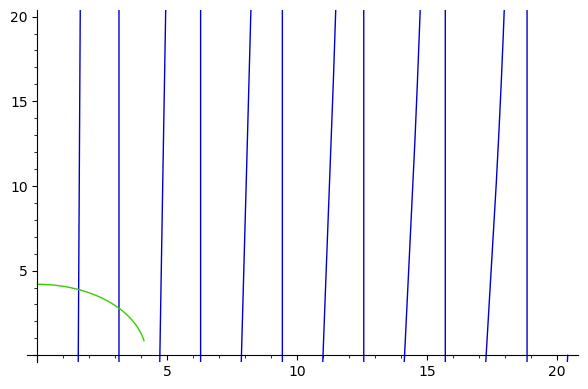

In [79]:
p = plot([even_disp_eq_fa(x).real(), sqrt((r * A)^2 - x^2)], (x, 0, kappa_A_max), ymin = 0, ymax = s_A_max)
p.show()

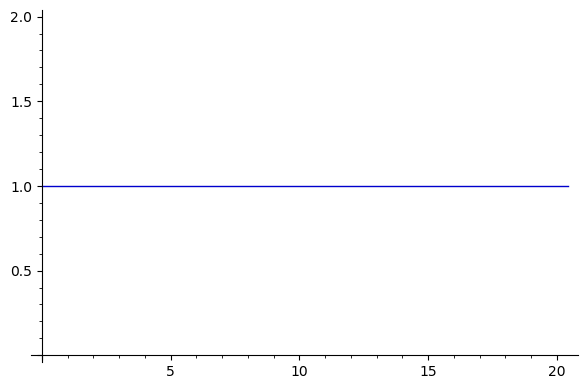

In [80]:
p = plot([even_disp_eq_fa(x).imag()], (x, 0, kappa_A_max))
p.show()

In [81]:
even_disp_eq_f = lambda x : even_disp_eq_s_d.rhs().subs(kappa == x).subs(a == A).subs(k_z == 1, k_x == 1)
even_disp_eq_f(x)

1/4493775893684088200000*(4493775893684088200000*I*x*sin(0.100000000000000*x) - 1.97302212503913e24*cos(0.100000000000000*x))/(x*sin(0.100000000000000*x))

verbose 0 (3839: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 159 points.
verbose 0 (3839: plot.py, generate_plot_points) Last error message: 'Unable to compute f(204.20352248333657)'


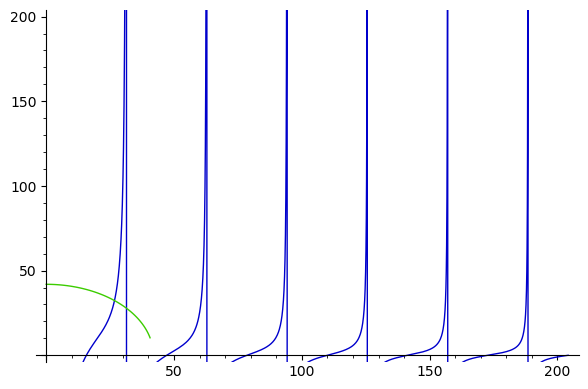

In [82]:
p = plot([even_disp_eq_f(x).real(), sqrt((r)^2 - x^2)], (x, 0, kappa_A_max / A), ymin = 0, ymax = s_A_max / A)
p.show()

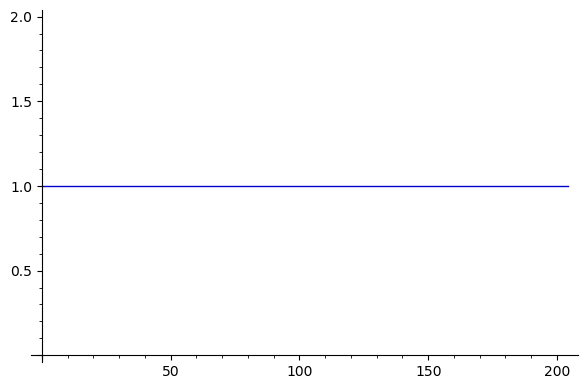

In [83]:
p = plot([even_disp_eq_f(x).imag()], (x, 0, kappa_A_max / A))
p.show()

even_f(x) = -sqrt(-x^2 + 1757.02654241586) - 439.056635603965*cos(0.100000000000000*x)/(x*sin(0.100000000000000*x))
verbose 0 (3839: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 158 points.
verbose 0 (3839: plot.py, generate_plot_points) Last error message: 'unable to simplify to float approximation'


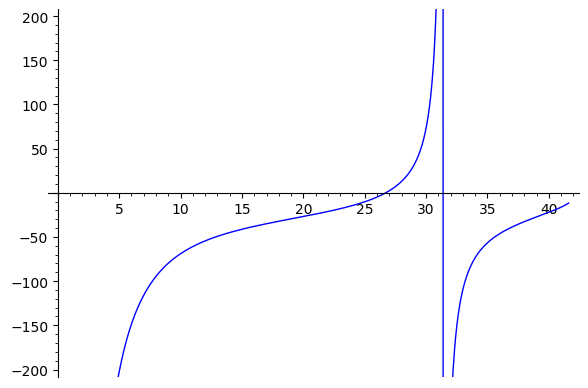

In [84]:
even_f = lambda x : even_disp_eq_f(x).real() - sqrt((r)^2 - x^2)
print ("even_f(x) =",even_f(x))
p = plot(even_f, (0, kappa_A_max / A), ymin = - s_A_max / A, ymax = s_A_max / A)
p.show()

In [85]:
even_kappa_sol = find_root(even_f(x) == 0, 0, 30)#pi/2/A)
print("even_kappa_sol", even_kappa_sol)

even_kappa_sol 26.70895036129112


In [86]:
even_kz_sol = solve(eq_kappa_inner_vacuum, k_z)
print("even_kz_sol =", even_kz_sol)

even_kz_sol = [
k_z == -sqrt(-c^2*kappa^2 + omega^2)/c,
k_z == sqrt(-c^2*kappa^2 + omega^2)/c
]


In [87]:
even_kz_sol = abs(even_kz_sol[0].rhs()).subs(digit_values).subs(kappa == even_kappa_sol)
print("even_kz_sol =", even_kz_sol)

even_kz_sol = 16.5563097880521


In [88]:
even_s_sol = even_disp_eq_s_d.rhs()
print("even_s_sol =", even_s_sol)

even_s_sol = 1/4493775893684088200000*(898755178736817640000*k_z^2*cos(a*kappa) + 4493775893684088200000*I*k_x*kappa*sin(a*kappa) - 1.97392088021787e24*cos(a*kappa))/(kappa*sin(a*kappa))


In [89]:
even_s_sol = even_s_sol.subs(kappa == even_kappa_sol)
print("even_s_sol =", even_s_sol)

even_s_sol = (8.331664412137778e-24)*(898755178736817640000*k_z^2*cos(26.70895036129112*a) + (1.2002403727917495e+23*I)*k_x*sin(26.70895036129112*a) - 1.97392088021787e24*cos(26.70895036129112*a))/sin(26.70895036129112*a)


In [90]:
even_s_sol = even_s_sol.subs(a == A).subs(k_z == even_kz_sol)
print("even_s_sol =", even_s_sol)

even_s_sol = 0.9999999999999999*I*k_x + 28.2866071137419


In [91]:
even_s_sol

0.9999999999999999*I*k_x + 28.2866071137419

In [96]:
even_E_bad_conductor_z (x)

A2_z*e^(I*ks_x*x)

In [97]:
even_E_bad_conductor_z (x).subs(A2_z == even_A)

-(-I*B2_z*c^2*k_z^2*cos(a*kappa) + I*B2_z*epsilon*mu*omega^2*cos(a*kappa))*e^(-I*a*ks_x + I*ks_x*x)/(c^2*epsilon*kappa*ks_x)

In [92]:
even_E_inner_vacuum_z_d (x) = even_E_inner_vacuum_z (x).subs(B2_z == 1, kappa == even_kappa_sol)
print ("even_E_inner_vacuum_z_d (x) =", even_E_inner_vacuum_z_d (x))

even_E_bad_conductor_z_d (x) = even_E_bad_conductor_z (x).subs(A2_z == even_A).subs(B2_z == 1, s_x == even_s_sol, kappa == even_kappa_sol, k_z == even_kz_sol, a == A)
print ("even_E_bad_conductor_z_d (x) =", even_E_bad_conductor_z_d (x))

even_E_inner_vacuum_z_d (x) = sin(26.70895036129112*x)
even_E_bad_conductor_z_d (x) = -0.03744063268953036*(-0.891252129890757*I*epsilon*mu*omega^2 + 244.302363549745*I*c^2)*e^(I*ks_x*x - 0.100000000000000*I*ks_x)/(c^2*epsilon*ks_x)


In [93]:
even_E_inner_vacuum_x_d (x) = even_E_inner_vacuum_x (x).subs(B2_z == 1, kappa == even_kappa_sol, k_z = even_kz_sol)
print ("even_E_inner_vacuum_x_d (x) =", even_E_inner_vacuum_x_d (x))
even_E_bad_conductor_x_d (x) = even_E_bad_conductor_x (x).subs(A2_z == even_A).subs(B2_z == 1, s_x == even_s_sol, kappa == even_kappa_sol, k_z == even_kz_sol, a == A)
print ("even_E_bad_conductor_x_d (x) =", even_E_bad_conductor_x_d (x))

even_E_inner_vacuum_x_d (x) = 0.6198787134685331*I*cos(26.70895036129112*x)
even_E_bad_conductor_x_d (x) = 0.619878713468533*(-0.891252129890757*I*epsilon*mu*omega^2 + 244.302363549745*I*c^2)*e^(I*ks_x*x - 0.100000000000000*I*ks_x)/((c^2*k_x^2 + 2*I*c^2*k_x*(0.9999999999999999*I*k_x + 28.2866071137419) - c^2*(0.9999999999999999*I*k_x + 28.2866071137419)^2 - 4*I*pi*mu*omega*sigma)*epsilon)


In [94]:
even_H_inner_vacuum_y_d (x) = even_H_inner_vacuum_y (x).subs(B2_z == 1, kappa == even_kappa_sol).subs(digit_values)
print ("even_H_inner_vacuum_y_d (x) =", even_H_inner_vacuum_y_d (x))
even_H_bad_conductor_y_d (x) = even_H_bad_conductor_y (x).subs(A2_z == even_A).subs(B2_z == 1, s_x == even_s_sol, kappa == even_kappa_sol, a == A).subs(digit_values)
print ("even_H_bad_conductor_y_d (x) =", even_H_bad_conductor_y_d (x))

even_H_inner_vacuum_y_d (x) = 0.784697636410736*I*cos(26.70895036129112*x)
even_H_bad_conductor_y_d (x) = -0.000357284363083918*(8.01017467299537e20*I*k_z^2 - 1.75926118873002e24*I)*k_z^2*e^(I*ks_x*x - 0.100000000000000*I*ks_x)/(898755178736817640000*k_z^2 - 1.97392088021787e24) + (3.975324666124029e-25)*(8.01017467299537e20*I*k_z^2 - 1.75926118873002e24*I)*e^(I*ks_x*x - 0.100000000000000*I*ks_x)


In [95]:
p = plot(even_E_inner_vacuum_z_d (x), (x, 0, A))
p += plot(even_E_bad_conductor_z_d (x), (x, A, 3*A))
p.show()

ValueError: Variable 'epsilon' not found

In [ ]:
p = plot(even_E_inner_vacuum_x_d (x).imag(), (x, 0, A))
p += plot(even_E_bad_conductor_x_d (x).imag(), (x, A, 3*A))
p.show()

In [ ]:
p = plot(even_E_inner_vacuum_x_d (x).imag()*epsilon.subs(digit_values), (x, 0, A))
p += plot(even_E_bad_conductor_x_d (x).imag(), (x, A, 3*A))
p.show()

In [ ]:
p = plot(even_H_inner_vacuum_y_d (x).imag(), (x, 0, A))
p += plot(even_H_bad_conductor_y_d (x).imag(), (x, A, 3*A))
p.show()

Решение получено и соответствует приведенному в решебнике ответу.

Теперь посчитаем:

1) пондеромоторную силу, приложенную к идеальному проводнику

2) пондеромоторную силу, приложенную к границе диэлектрика и вакуума


In [ ]:
# Abraham force
# (epsilon * mu - 1) / (4 * pi * c) * ([E x H]).diff(t)
# (epsilon * mu - 1) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([a x b])_x = a_y * b_z - a_z * b_y
# f_x = (epsilon * mu - 1) / (4 * pi * c) * (-E_z.diff(t) * H_y - E_z * H_y.diff(t))
# E_z.diff(t) = -I * omega * E_z
# H_y.diff(t) = -I * omega * H_y

#
# alpha = - omega * t
#

# f_x = (epsilon * mu - 1) / (4 * pi * c) * 
#       integrate(
#         ( - Re(-I*omega * E_z * e^alpha) * Re(H_y * e^alpha)) +
#         ( - Re(E_z * e^alpha) * Re(-I*omega * H_y * e^alpha)) 
#       (alpha, 0, 2*pi))


# f_x = (epsilon * mu - 1) / (2 * 4 * pi * c) * (
#             ( - Re(-I*omega * E_z) * Re(H_y) - Im(-I*omega * E_z) * Im(H_y)) +
#             ( - Re(E_z) * Re(-I*omega * H_y) - Im(E_z) * Im(-I*omega * H_y)) 
#       )

f_x(x) = (epsilon * mu - 1) / (8 * pi * c) * \
    ( \
        - ( -I * omega * even_E_inner_vacuum_z (x)).real_part() * (even_H_inner_vacuum_y (x)).real_part() \
        - ( -I * omega * even_E_inner_vacuum_z (x)).imag_part() * (even_H_inner_vacuum_y (x)).imag_part() \
        - (even_E_inner_vacuum_z (x)).real_part() * ( -I * omega * even_H_inner_vacuum_y (x)).real_part() \
        - (even_E_inner_vacuum_z (x)).imag_part() * ( -I * omega * even_H_inner_vacuum_y (x)).imag_part() \
    )
print("f_x =", f_x(x))
display(Math(latex(f_x(x))))

In [ ]:
f_x(x) = f_x(x).subs(digit_values)
print("f_x =")
display(Math(latex(f_x(x))))

In [ ]:
f_x(x) = f_x(x).subs(B2_z == 1, kappa == even_kappa_sol)
print("f_x =", f_x(x))
plot(f_x(x), (x, 0, A))

In [ ]:
F_x = integrate(f_x(x), (x, 0, A))
print("F_x =", F_x)

1) пондеромоторная сила, приложенная к идеальному проводнику

In [ ]:
# superconductor force
# additional 1/2 arises as result of integration on period
f_superconductor = - abs((even_H_inner_vacuum_y (0)^2) / (2*8*pi))
print("f_superconductor =", f_superconductor)

In [ ]:
f_superconductor = f_superconductor.subs(digit_values).subs(B2_z == 1, kappa == even_kappa_sol)
print("f_superconductor =", f_superconductor)

2) пондеромоторная сила, приложенная к плохому проводнику

In [ ]:
# bad conductor force
# additional 1/2 arises as result of integration on period
f_bad_conductor = abs((even_H_inner_vacuum_y (a)^2) / (2*8*pi))
print("f_bad_conductor =", f_bad_conductor)

In [ ]:
f_bad_conductor_d  = f_bad_conductor .subs(digit_values).subs(B2_z == 1, kappa == even_kappa_sol, a == A)
print("f_bad_conductor_d  =", f_bad_conductor_d )

Результаты вычислений показывают, что тяга в волновом двигателе с внутренним расходом энергии Ф.Ф.Менде (MenDrive) ненулевая и равна

In [ ]:
(f_superconductor + f_bad_conductor).full_simplify()

In [ ]:
f_superconductor_d + f_bad_conductor_d

отрицательный знак соответствует направлению тяги в сторону уменьшения значений x